In [20]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

Getting the Data

In [22]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [23]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Exploration/Analysis

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

In [26]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Let’s take a more detailed look at what data is actually missing:

In [27]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [28]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

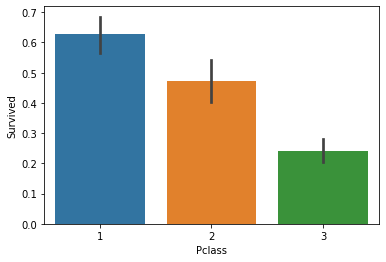

In [29]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

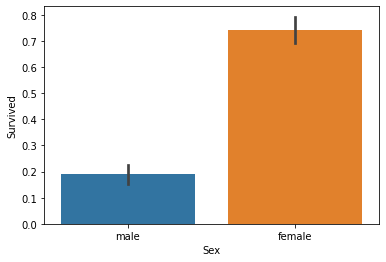

In [30]:
sns.barplot(x='Sex',y='Survived',data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

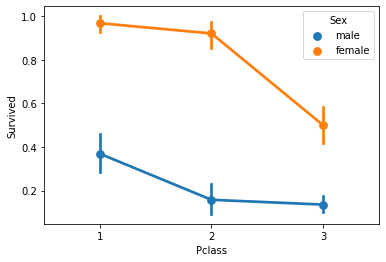

In [31]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=train_df)

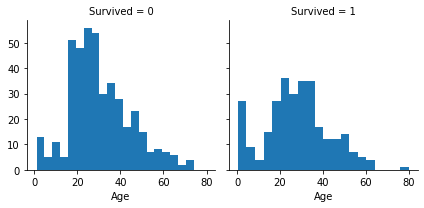

In [32]:
ageeff = sns.FacetGrid(train_df, col='Survived')
ageeff.map(plt.hist, 'Age', bins=20)

### Data Preprocessing

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission.

In [33]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [34]:
# extracting and then removing the targets from the training data 
targets = train_df['Survived']
train_df.drop(['Survived'], 1, inplace=True)

In [35]:
# merging train data and test data for future feature engineering
# we'll also remove the PassengerID since this is not an informative feature
combined = train_df.append(test_df)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)

In [36]:
#Now let's map the title can bin them
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [37]:
#Generate a new Title column
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined['Title'].map(Title_Dictionary)

In [38]:
#let's get the median age based on people's gender, Pclass and Title
fill_mean = lambda g: g.fillna(g.mean())
combined['Age'] = combined.groupby(['Sex', 'Title', 'Pclass'])['Age'].apply(fill_mean)

In [39]:
# Name can be dropped now
combined.drop('Name', axis=1, inplace=True)

In [40]:
# removing the title variable
combined.drop('Title', axis=1, inplace=True)

In [41]:
# removing the Cabin variable
combined.drop('Cabin', axis=1, inplace=True)

In [42]:
# removing the Ticket variable
combined.drop('Ticket', axis=1, inplace=True)

In [43]:
#Fill out the missing fare data
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

In [44]:
# two missing embarked values - filling them with the most frequent one in the train set
combined['Embarked'].fillna('S', inplace=True)

In [45]:
# encoding in dummy variable
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)
combined.drop('Embarked', axis=1, inplace=True)

In [46]:
# mapping gender to numerical one 
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

In [47]:
# introducing a new feature : the size of families (including the passenger)
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

In [48]:
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.00000,1,0,7.2500,0,0,1,2
1,1,0,38.00000,1,0,71.2833,1,0,0,2
2,3,0,26.00000,0,0,7.9250,0,0,1,1
3,1,0,35.00000,1,0,53.1000,0,0,1,2
4,3,1,35.00000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,1,28.31891,0,0,8.0500,0,0,1,1
1305,1,0,39.00000,0,0,108.9000,1,0,0,1
1306,3,1,38.50000,0,0,7.2500,0,0,1,1
1307,3,1,28.31891,0,0,8.0500,0,0,1,1


### Modelling preparing

In [49]:
#Prepare the training dataset
df_im_input=combined.iloc[:891]
df_im_output=targets


In [50]:
df_im_output

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [51]:
df_im_input

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.000000,1,0,7.2500,0,0,1,2
1,1,0,38.000000,1,0,71.2833,1,0,0,2
2,3,0,26.000000,0,0,7.9250,0,0,1,1
3,1,0,35.000000,1,0,53.1000,0,0,1,2
4,3,1,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1,1
887,1,0,19.000000,0,0,30.0000,0,0,1,1
888,3,0,17.360874,1,2,23.4500,0,0,1,4
889,1,1,26.000000,0,0,30.0000,1,0,0,1


In [52]:
df_test_input=combined.iloc[891:]

In [53]:
from sklearn.ensemble import RandomForestClassifier    #随机森林
from sklearn.neighbors import KNeighborsClassifier     #K最邻近算法
from sklearn.naive_bayes import GaussianNB             #朴素贝叶斯
from sklearn.linear_model import Perceptron            #感知机算法             
from sklearn.linear_model import SGDClassifier         #梯度下降分类
from sklearn.tree import DecisionTreeClassifier        #决策树算法
from sklearn.model_selection import StratifiedKFold    #K折交叉切分
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(df_im_input, df_im_output)
Y_pred = random_forest.predict(df_test_input)
random_forest.score(df_im_input, df_im_output)
acc_random_forest = round(random_forest.score(df_im_input, df_im_output) * 100, 2)
acc_random_forest

98.2

In [54]:
forestModel_null = RandomForestClassifier()
parameter_grid = {
                 'max_depth' : [4,5,6,7,8,9,10],
                 'n_estimators': [100,200,250,500],
                 'criterion': ['gini','entropy'],
                 'max_features':['sqrt','auto','log2']}
cross_validation = StratifiedKFold(n_splits=10).split(df_im_input, df_im_output)
grid_search = GridSearchCV(forestModel_null,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(df_im_input, df_im_output)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8406367041198501
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}


In [55]:
random_forest = RandomForestClassifier(n_estimators=250,max_depth=8,criterion='gini',max_features='auto')
random_forest.fit(df_im_input, df_im_output)
Y_pred = random_forest.predict(df_test_input)
random_forest.score(df_im_input, df_im_output)
acc_random_forest = round(random_forest.score(df_im_input, df_im_output) * 100, 2)
acc_random_forest

91.58

In [54]:
#k-fold with index pair return
def kfold_index(x_train,k):
    if k < 1:
        print('K cannot be smaller than 1')
        return
    else:
        l = x_train.shape[0]
        tail = l % k
        q = 1 // k
        index = [0]
        output_index = []
        #first n_examples % k sub_example have n_examples//k+1 elements
        for i in range(1,tail):
            index.append((i*q)+1)
        for j in range(tail,k+1):
            index.append(j*q+tail)
        for m in range(len(index)-1):
            output_index.append([index[m],index[m+1]])
            #print(output_index)
        return output_index

In [55]:
kfold_index(df_im_input,10)

[[0, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1]]

In [56]:
#Grid search dict
param_grid = {
    'eta':[0.01,0.05],
    'objective':['binary:logistic','reg:logistic'],
    'subsample':[0.5,0.75],
    'colsample_bytree':[0.5,0.75],
    'max_depth':[5,10,15],
    'gamma':[0,1,5],
    'n_estimators':[10,50]
}

In [62]:
#make item combination for param_grid dict
import itertools as it
s = sorted(param_grid)
print(s)
combination = it.product(*(param_grid[Name] for Name in s))
#print(list(combination))

['colsample_bytree', 'eta', 'gamma', 'max_depth', 'n_estimators', 'objective', 'subsample']


In [15]:
combination_list=(0.5, 0.01, 0, 5, 10, 'binary:logistic', 0.5), (0.5, 0.01, 0, 5, 10, 'binary:logistic', 0.75), (0.5, 0.01, 0, 5, 10, 'reg:logistic', 0.5), (0.5, 0.01, 0, 5, 10, 'reg:logistic', 0.75), (0.5, 0.01, 0, 5, 50, 'binary:logistic', 0.5), (0.5, 0.01, 0, 5, 50, 'binary:logistic', 0.75), (0.5, 0.01, 0, 5, 50, 'reg:logistic', 0.5), (0.5, 0.01, 0, 5, 50, 'reg:logistic', 0.75), (0.5, 0.01, 0, 10, 10, 'binary:logistic', 0.5), (0.5, 0.01, 0, 10, 10, 'binary:logistic', 0.75), (0.5, 0.01, 0, 10, 10, 'reg:logistic', 0.5), (0.5, 0.01, 0, 10, 10, 'reg:logistic', 0.75), (0.5, 0.01, 0, 10, 50, 'binary:logistic', 0.5), (0.5, 0.01, 0, 10, 50, 'binary:logistic', 0.75), (0.5, 0.01, 0, 10, 50, 'reg:logistic', 0.5), (0.5, 0.01, 0, 10, 50, 'reg:logistic', 0.75), (0.5, 0.01, 0, 15, 10, 'binary:logistic', 0.5), (0.5, 0.01, 0, 15, 10, 'binary:logistic', 0.75), (0.5, 0.01, 0, 15, 10, 'reg:logistic', 0.5), (0.5, 0.01, 0, 15, 10, 'reg:logistic', 0.75), (0.5, 0.01, 0, 15, 50, 'binary:logistic', 0.5), (0.5, 0.01, 0, 15, 50, 'binary:logistic', 0.75), (0.5, 0.01, 0, 15, 50, 'reg:logistic', 0.5), (0.5, 0.01, 0, 15, 50, 'reg:logistic', 0.75), (0.5, 0.01, 1, 5, 10, 'binary:logistic', 0.5), (0.5, 0.01, 1, 5, 10, 'binary:logistic', 0.75), (0.5, 0.01, 1, 5, 10, 'reg:logistic', 0.5), (0.5, 0.01, 1, 5, 10, 'reg:logistic', 0.75), (0.5, 0.01, 1, 5, 50, 'binary:logistic', 0.5), (0.5, 0.01, 1, 5, 50, 'binary:logistic', 0.75), (0.5, 0.01, 1, 5, 50, 'reg:logistic', 0.5), (0.5, 0.01, 1, 5, 50, 'reg:logistic', 0.75), (0.5, 0.01, 1, 10, 10, 'binary:logistic', 0.5), (0.5, 0.01, 1, 10, 10, 'binary:logistic', 0.75), (0.5, 0.01, 1, 10, 10, 'reg:logistic', 0.5), (0.5, 0.01, 1, 10, 10, 'reg:logistic', 0.75), (0.5, 0.01, 1, 10, 50, 'binary:logistic', 0.5), (0.5, 0.01, 1, 10, 50, 'binary:logistic', 0.75), (0.5, 0.01, 1, 10, 50, 'reg:logistic', 0.5), (0.5, 0.01, 1, 10, 50, 'reg:logistic', 0.75), (0.5, 0.01, 1, 15, 10, 'binary:logistic', 0.5), (0.5, 0.01, 1, 15, 10, 'binary:logistic', 0.75), (0.5, 0.01, 1, 15, 10, 'reg:logistic', 0.5), (0.5, 0.01, 1, 15, 10, 'reg:logistic', 0.75), (0.5, 0.01, 1, 15, 50, 'binary:logistic', 0.5), (0.5, 0.01, 1, 15, 50, 'binary:logistic', 0.75), (0.5, 0.01, 1, 15, 50, 'reg:logistic', 0.5), (0.5, 0.01, 1, 15, 50, 'reg:logistic', 0.75), (0.5, 0.01, 5, 5, 10, 'binary:logistic', 0.5), (0.5, 0.01, 5, 5, 10, 'binary:logistic', 0.75), (0.5, 0.01, 5, 5, 10, 'reg:logistic', 0.5), (0.5, 0.01, 5, 5, 10, 'reg:logistic', 0.75), (0.5, 0.01, 5, 5, 50, 'binary:logistic', 0.5), (0.5, 0.01, 5, 5, 50, 'binary:logistic', 0.75), (0.5, 0.01, 5, 5, 50, 'reg:logistic', 0.5), (0.5, 0.01, 5, 5, 50, 'reg:logistic', 0.75), (0.5, 0.01, 5, 10, 10, 'binary:logistic', 0.5), (0.5, 0.01, 5, 10, 10, 'binary:logistic', 0.75), (0.5, 0.01, 5, 10, 10, 'reg:logistic', 0.5), (0.5, 0.01, 5, 10, 10, 'reg:logistic', 0.75), (0.5, 0.01, 5, 10, 50, 'binary:logistic', 0.5), (0.5, 0.01, 5, 10, 50, 'binary:logistic', 0.75), (0.5, 0.01, 5, 10, 50, 'reg:logistic', 0.5), (0.5, 0.01, 5, 10, 50, 'reg:logistic', 0.75), (0.5, 0.01, 5, 15, 10, 'binary:logistic', 0.5), (0.5, 0.01, 5, 15, 10, 'binary:logistic', 0.75), (0.5, 0.01, 5, 15, 10, 'reg:logistic', 0.5), (0.5, 0.01, 5, 15, 10, 'reg:logistic', 0.75), (0.5, 0.01, 5, 15, 50, 'binary:logistic', 0.5), (0.5, 0.01, 5, 15, 50, 'binary:logistic', 0.75), (0.5, 0.01, 5, 15, 50, 'reg:logistic', 0.5), (0.5, 0.01, 5, 15, 50, 'reg:logistic', 0.75), (0.5, 0.05, 0, 5, 10, 'binary:logistic', 0.5), (0.5, 0.05, 0, 5, 10, 'binary:logistic', 0.75), (0.5, 0.05, 0, 5, 10, 'reg:logistic', 0.5), (0.5, 0.05, 0, 5, 10, 'reg:logistic', 0.75), (0.5, 0.05, 0, 5, 50, 'binary:logistic', 0.5), (0.5, 0.05, 0, 5, 50, 'binary:logistic', 0.75), (0.5, 0.05, 0, 5, 50, 'reg:logistic', 0.5), (0.5, 0.05, 0, 5, 50, 'reg:logistic', 0.75), (0.5, 0.05, 0, 10, 10, 'binary:logistic', 0.5), (0.5, 0.05, 0, 10, 10, 'binary:logistic', 0.75), (0.5, 0.05, 0, 10, 10, 'reg:logistic', 0.5), (0.5, 0.05, 0, 10, 10, 'reg:logistic', 0.75), (0.5, 0.05, 0, 10, 50, 'binary:logistic', 0.5), (0.5, 0.05, 0, 10, 50, 'binary:logistic', 0.75), (0.5, 0.05, 0, 10, 50, 'reg:logistic', 0.5), (0.5, 0.05, 0, 10, 50, 'reg:logistic', 0.75), (0.5, 0.05, 0, 15, 10, 'binary:logistic', 0.5), (0.5, 0.05, 0, 15, 10, 'binary:logistic', 0.75), (0.5, 0.05, 0, 15, 10, 'reg:logistic', 0.5), (0.5, 0.05, 0, 15, 10, 'reg:logistic', 0.75), (0.5, 0.05, 0, 15, 50, 'binary:logistic', 0.5), (0.5, 0.05, 0, 15, 50, 'binary:logistic', 0.75), (0.5, 0.05, 0, 15, 50, 'reg:logistic', 0.5), (0.5, 0.05, 0, 15, 50, 'reg:logistic', 0.75), (0.5, 0.05, 1, 5, 10, 'binary:logistic', 0.5), (0.5, 0.05, 1, 5, 10, 'binary:logistic', 0.75), (0.5, 0.05, 1, 5, 10, 'reg:logistic', 0.5), (0.5, 0.05, 1, 5, 10, 'reg:logistic', 0.75), (0.5, 0.05, 1, 5, 50, 'binary:logistic', 0.5), (0.5, 0.05, 1, 5, 50, 'binary:logistic', 0.75), (0.5, 0.05, 1, 5, 50, 'reg:logistic', 0.5), (0.5, 0.05, 1, 5, 50, 'reg:logistic', 0.75), (0.5, 0.05, 1, 10, 10, 'binary:logistic', 0.5), (0.5, 0.05, 1, 10, 10, 'binary:logistic', 0.75), (0.5, 0.05, 1, 10, 10, 'reg:logistic', 0.5), (0.5, 0.05, 1, 10, 10, 'reg:logistic', 0.75), (0.5, 0.05, 1, 10, 50, 'binary:logistic', 0.5), (0.5, 0.05, 1, 10, 50, 'binary:logistic', 0.75), (0.5, 0.05, 1, 10, 50, 'reg:logistic', 0.5), (0.5, 0.05, 1, 10, 50, 'reg:logistic', 0.75), (0.5, 0.05, 1, 15, 10, 'binary:logistic', 0.5), (0.5, 0.05, 1, 15, 10, 'binary:logistic', 0.75), (0.5, 0.05, 1, 15, 10, 'reg:logistic', 0.5), (0.5, 0.05, 1, 15, 10, 'reg:logistic', 0.75), (0.5, 0.05, 1, 15, 50, 'binary:logistic', 0.5), (0.5, 0.05, 1, 15, 50, 'binary:logistic', 0.75), (0.5, 0.05, 1, 15, 50, 'reg:logistic', 0.5), (0.5, 0.05, 1, 15, 50, 'reg:logistic', 0.75), (0.5, 0.05, 5, 5, 10, 'binary:logistic', 0.5), (0.5, 0.05, 5, 5, 10, 'binary:logistic', 0.75), (0.5, 0.05, 5, 5, 10, 'reg:logistic', 0.5), (0.5, 0.05, 5, 5, 10, 'reg:logistic', 0.75), (0.5, 0.05, 5, 5, 50, 'binary:logistic', 0.5), (0.5, 0.05, 5, 5, 50, 'binary:logistic', 0.75), (0.5, 0.05, 5, 5, 50, 'reg:logistic', 0.5), (0.5, 0.05, 5, 5, 50, 'reg:logistic', 0.75), (0.5, 0.05, 5, 10, 10, 'binary:logistic', 0.5), (0.5, 0.05, 5, 10, 10, 'binary:logistic', 0.75), (0.5, 0.05, 5, 10, 10, 'reg:logistic', 0.5), (0.5, 0.05, 5, 10, 10, 'reg:logistic', 0.75), (0.5, 0.05, 5, 10, 50, 'binary:logistic', 0.5), (0.5, 0.05, 5, 10, 50, 'binary:logistic', 0.75), (0.5, 0.05, 5, 10, 50, 'reg:logistic', 0.5), (0.5, 0.05, 5, 10, 50, 'reg:logistic', 0.75), (0.5, 0.05, 5, 15, 10, 'binary:logistic', 0.5), (0.5, 0.05, 5, 15, 10, 'binary:logistic', 0.75), (0.5, 0.05, 5, 15, 10, 'reg:logistic', 0.5), (0.5, 0.05, 5, 15, 10, 'reg:logistic', 0.75), (0.5, 0.05, 5, 15, 50, 'binary:logistic', 0.5), (0.5, 0.05, 5, 15, 50, 'binary:logistic', 0.75), (0.5, 0.05, 5, 15, 50, 'reg:logistic', 0.5), (0.5, 0.05, 5, 15, 50, 'reg:logistic', 0.75), (0.75, 0.01, 0, 5, 10, 'binary:logistic', 0.5), (0.75, 0.01, 0, 5, 10, 'binary:logistic', 0.75), (0.75, 0.01, 0, 5, 10, 'reg:logistic', 0.5), (0.75, 0.01, 0, 5, 10, 'reg:logistic', 0.75), (0.75, 0.01, 0, 5, 50, 'binary:logistic', 0.5), (0.75, 0.01, 0, 5, 50, 'binary:logistic', 0.75), (0.75, 0.01, 0, 5, 50, 'reg:logistic', 0.5), (0.75, 0.01, 0, 5, 50, 'reg:logistic', 0.75), (0.75, 0.01, 0, 10, 10, 'binary:logistic', 0.5), (0.75, 0.01, 0, 10, 10, 'binary:logistic', 0.75), (0.75, 0.01, 0, 10, 10, 'reg:logistic', 0.5), (0.75, 0.01, 0, 10, 10, 'reg:logistic', 0.75), (0.75, 0.01, 0, 10, 50, 'binary:logistic', 0.5), (0.75, 0.01, 0, 10, 50, 'binary:logistic', 0.75), (0.75, 0.01, 0, 10, 50, 'reg:logistic', 0.5), (0.75, 0.01, 0, 10, 50, 'reg:logistic', 0.75), (0.75, 0.01, 0, 15, 10, 'binary:logistic', 0.5), (0.75, 0.01, 0, 15, 10, 'binary:logistic', 0.75), (0.75, 0.01, 0, 15, 10, 'reg:logistic', 0.5), (0.75, 0.01, 0, 15, 10, 'reg:logistic', 0.75), (0.75, 0.01, 0, 15, 50, 'binary:logistic', 0.5), (0.75, 0.01, 0, 15, 50, 'binary:logistic', 0.75), (0.75, 0.01, 0, 15, 50, 'reg:logistic', 0.5), (0.75, 0.01, 0, 15, 50, 'reg:logistic', 0.75), (0.75, 0.01, 1, 5, 10, 'binary:logistic', 0.5), (0.75, 0.01, 1, 5, 10, 'binary:logistic', 0.75), (0.75, 0.01, 1, 5, 10, 'reg:logistic', 0.5), (0.75, 0.01, 1, 5, 10, 'reg:logistic', 0.75), (0.75, 0.01, 1, 5, 50, 'binary:logistic', 0.5), (0.75, 0.01, 1, 5, 50, 'binary:logistic', 0.75), (0.75, 0.01, 1, 5, 50, 'reg:logistic', 0.5), (0.75, 0.01, 1, 5, 50, 'reg:logistic', 0.75), (0.75, 0.01, 1, 10, 10, 'binary:logistic', 0.5), (0.75, 0.01, 1, 10, 10, 'binary:logistic', 0.75), (0.75, 0.01, 1, 10, 10, 'reg:logistic', 0.5), (0.75, 0.01, 1, 10, 10, 'reg:logistic', 0.75), (0.75, 0.01, 1, 10, 50, 'binary:logistic', 0.5), (0.75, 0.01, 1, 10, 50, 'binary:logistic', 0.75), (0.75, 0.01, 1, 10, 50, 'reg:logistic', 0.5), (0.75, 0.01, 1, 10, 50, 'reg:logistic', 0.75), (0.75, 0.01, 1, 15, 10, 'binary:logistic', 0.5), (0.75, 0.01, 1, 15, 10, 'binary:logistic', 0.75), (0.75, 0.01, 1, 15, 10, 'reg:logistic', 0.5), (0.75, 0.01, 1, 15, 10, 'reg:logistic', 0.75), (0.75, 0.01, 1, 15, 50, 'binary:logistic', 0.5), (0.75, 0.01, 1, 15, 50, 'binary:logistic', 0.75), (0.75, 0.01, 1, 15, 50, 'reg:logistic', 0.5), (0.75, 0.01, 1, 15, 50, 'reg:logistic', 0.75), (0.75, 0.01, 5, 5, 10, 'binary:logistic', 0.5), (0.75, 0.01, 5, 5, 10, 'binary:logistic', 0.75), (0.75, 0.01, 5, 5, 10, 'reg:logistic', 0.5), (0.75, 0.01, 5, 5, 10, 'reg:logistic', 0.75), (0.75, 0.01, 5, 5, 50, 'binary:logistic', 0.5), (0.75, 0.01, 5, 5, 50, 'binary:logistic', 0.75), (0.75, 0.01, 5, 5, 50, 'reg:logistic', 0.5), (0.75, 0.01, 5, 5, 50, 'reg:logistic', 0.75), (0.75, 0.01, 5, 10, 10, 'binary:logistic', 0.5), (0.75, 0.01, 5, 10, 10, 'binary:logistic', 0.75), (0.75, 0.01, 5, 10, 10, 'reg:logistic', 0.5), (0.75, 0.01, 5, 10, 10, 'reg:logistic', 0.75), (0.75, 0.01, 5, 10, 50, 'binary:logistic', 0.5), (0.75, 0.01, 5, 10, 50, 'binary:logistic', 0.75), (0.75, 0.01, 5, 10, 50, 'reg:logistic', 0.5), (0.75, 0.01, 5, 10, 50, 'reg:logistic', 0.75), (0.75, 0.01, 5, 15, 10, 'binary:logistic', 0.5), (0.75, 0.01, 5, 15, 10, 'binary:logistic', 0.75), (0.75, 0.01, 5, 15, 10, 'reg:logistic', 0.5), (0.75, 0.01, 5, 15, 10, 'reg:logistic', 0.75), (0.75, 0.01, 5, 15, 50, 'binary:logistic', 0.5), (0.75, 0.01, 5, 15, 50, 'binary:logistic', 0.75), (0.75, 0.01, 5, 15, 50, 'reg:logistic', 0.5), (0.75, 0.01, 5, 15, 50, 'reg:logistic', 0.75), (0.75, 0.05, 0, 5, 10, 'binary:logistic', 0.5), (0.75, 0.05, 0, 5, 10, 'binary:logistic', 0.75), (0.75, 0.05, 0, 5, 10, 'reg:logistic', 0.5), (0.75, 0.05, 0, 5, 10, 'reg:logistic', 0.75), (0.75, 0.05, 0, 5, 50, 'binary:logistic', 0.5), (0.75, 0.05, 0, 5, 50, 'binary:logistic', 0.75), (0.75, 0.05, 0, 5, 50, 'reg:logistic', 0.5), (0.75, 0.05, 0, 5, 50, 'reg:logistic', 0.75), (0.75, 0.05, 0, 10, 10, 'binary:logistic', 0.5), (0.75, 0.05, 0, 10, 10, 'binary:logistic', 0.75), (0.75, 0.05, 0, 10, 10, 'reg:logistic', 0.5), (0.75, 0.05, 0, 10, 10, 'reg:logistic', 0.75), (0.75, 0.05, 0, 10, 50, 'binary:logistic', 0.5), (0.75, 0.05, 0, 10, 50, 'binary:logistic', 0.75), (0.75, 0.05, 0, 10, 50, 'reg:logistic', 0.5), (0.75, 0.05, 0, 10, 50, 'reg:logistic', 0.75), (0.75, 0.05, 0, 15, 10, 'binary:logistic', 0.5), (0.75, 0.05, 0, 15, 10, 'binary:logistic', 0.75), (0.75, 0.05, 0, 15, 10, 'reg:logistic', 0.5), (0.75, 0.05, 0, 15, 10, 'reg:logistic', 0.75), (0.75, 0.05, 0, 15, 50, 'binary:logistic', 0.5), (0.75, 0.05, 0, 15, 50, 'binary:logistic', 0.75), (0.75, 0.05, 0, 15, 50, 'reg:logistic', 0.5), (0.75, 0.05, 0, 15, 50, 'reg:logistic', 0.75), (0.75, 0.05, 1, 5, 10, 'binary:logistic', 0.5), (0.75, 0.05, 1, 5, 10, 'binary:logistic', 0.75), (0.75, 0.05, 1, 5, 10, 'reg:logistic', 0.5), (0.75, 0.05, 1, 5, 10, 'reg:logistic', 0.75), (0.75, 0.05, 1, 5, 50, 'binary:logistic', 0.5), (0.75, 0.05, 1, 5, 50, 'binary:logistic', 0.75), (0.75, 0.05, 1, 5, 50, 'reg:logistic', 0.5), (0.75, 0.05, 1, 5, 50, 'reg:logistic', 0.75), (0.75, 0.05, 1, 10, 10, 'binary:logistic', 0.5), (0.75, 0.05, 1, 10, 10, 'binary:logistic', 0.75), (0.75, 0.05, 1, 10, 10, 'reg:logistic', 0.5), (0.75, 0.05, 1, 10, 10, 'reg:logistic', 0.75), (0.75, 0.05, 1, 10, 50, 'binary:logistic', 0.5), (0.75, 0.05, 1, 10, 50, 'binary:logistic', 0.75), (0.75, 0.05, 1, 10, 50, 'reg:logistic', 0.5), (0.75, 0.05, 1, 10, 50, 'reg:logistic', 0.75), (0.75, 0.05, 1, 15, 10, 'binary:logistic', 0.5), (0.75, 0.05, 1, 15, 10, 'binary:logistic', 0.75), (0.75, 0.05, 1, 15, 10, 'reg:logistic', 0.5), (0.75, 0.05, 1, 15, 10, 'reg:logistic', 0.75), (0.75, 0.05, 1, 15, 50, 'binary:logistic', 0.5), (0.75, 0.05, 1, 15, 50, 'binary:logistic', 0.75), (0.75, 0.05, 1, 15, 50, 'reg:logistic', 0.5), (0.75, 0.05, 1, 15, 50, 'reg:logistic', 0.75), (0.75, 0.05, 5, 5, 10, 'binary:logistic', 0.5), (0.75, 0.05, 5, 5, 10, 'binary:logistic', 0.75), (0.75, 0.05, 5, 5, 10, 'reg:logistic', 0.5), (0.75, 0.05, 5, 5, 10, 'reg:logistic', 0.75), (0.75, 0.05, 5, 5, 50, 'binary:logistic', 0.5), (0.75, 0.05, 5, 5, 50, 'binary:logistic', 0.75), (0.75, 0.05, 5, 5, 50, 'reg:logistic', 0.5), (0.75, 0.05, 5, 5, 50, 'reg:logistic', 0.75), (0.75, 0.05, 5, 10, 10, 'binary:logistic', 0.5), (0.75, 0.05, 5, 10, 10, 'binary:logistic', 0.75), (0.75, 0.05, 5, 10, 10, 'reg:logistic', 0.5), (0.75, 0.05, 5, 10, 10, 'reg:logistic', 0.75), (0.75, 0.05, 5, 10, 50, 'binary:logistic', 0.5), (0.75, 0.05, 5, 10, 50, 'binary:logistic', 0.75), (0.75, 0.05, 5, 10, 50, 'reg:logistic', 0.5), (0.75, 0.05, 5, 10, 50, 'reg:logistic', 0.75), (0.75, 0.05, 5, 15, 10, 'binary:logistic', 0.5), (0.75, 0.05, 5, 15, 10, 'binary:logistic', 0.75), (0.75, 0.05, 5, 15, 10, 'reg:logistic', 0.5), (0.75, 0.05, 5, 15, 10, 'reg:logistic', 0.75), (0.75, 0.05, 5, 15, 50, 'binary:logistic', 0.5), (0.75, 0.05, 5, 15, 50, 'binary:logistic', 0.75), (0.75, 0.05, 5, 15, 50, 'reg:logistic', 0.5), (0.75, 0.05, 5, 15, 50, 'reg:logistic', 0.75)


In [64]:
for i in combination_list:
    print (i) 

(0.5, 0.01, 0, 5, 10, 'binary:logistic', 0.5)
(0.5, 0.01, 0, 5, 10, 'binary:logistic', 0.75)
(0.5, 0.01, 0, 5, 10, 'reg:logistic', 0.5)
(0.5, 0.01, 0, 5, 10, 'reg:logistic', 0.75)
(0.5, 0.01, 0, 5, 50, 'binary:logistic', 0.5)
(0.5, 0.01, 0, 5, 50, 'binary:logistic', 0.75)
(0.5, 0.01, 0, 5, 50, 'reg:logistic', 0.5)
(0.5, 0.01, 0, 5, 50, 'reg:logistic', 0.75)
(0.5, 0.01, 0, 10, 10, 'binary:logistic', 0.5)
(0.5, 0.01, 0, 10, 10, 'binary:logistic', 0.75)
(0.5, 0.01, 0, 10, 10, 'reg:logistic', 0.5)
(0.5, 0.01, 0, 10, 10, 'reg:logistic', 0.75)
(0.5, 0.01, 0, 10, 50, 'binary:logistic', 0.5)
(0.5, 0.01, 0, 10, 50, 'binary:logistic', 0.75)
(0.5, 0.01, 0, 10, 50, 'reg:logistic', 0.5)
(0.5, 0.01, 0, 10, 50, 'reg:logistic', 0.75)
(0.5, 0.01, 0, 15, 10, 'binary:logistic', 0.5)
(0.5, 0.01, 0, 15, 10, 'binary:logistic', 0.75)
(0.5, 0.01, 0, 15, 10, 'reg:logistic', 0.5)
(0.5, 0.01, 0, 15, 10, 'reg:logistic', 0.75)
(0.5, 0.01, 0, 15, 50, 'binary:logistic', 0.5)
(0.5, 0.01, 0, 15, 50, 'binary:logistic',

In [73]:
from sklearn.model_selection import cross_val_score
def para(a,b):
    rtree = RandomForestClassifier(n_estimators = a,max_depth = b, random_state=0 )
    scores = cross_val_score(estimator = rtree, X = df_im_input, y = df_im_output.values.reshape(-1),cv = 6, scoring='accuracy')
    return scores.mean()

In [74]:
score = 0
for i in combination_list:
    s = para(i[4],i[3])
    if s>=score:
        score = s
        est_opt = i[4]
        dep_opt = i[3]
print(est_opt,dep_opt)

50 10


In [84]:
score = 0
for i in ['auto','sqrt','log2']:
    rtree = RandomForestClassifier(n_estimators = 50,max_depth = 10, random_state= 0, max_features=1)
    s = cv(rtree,df_im_input,df_im_output,10)
    if s>=score:
        score = s
        est_i = i
print(i)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required.

In [77]:
import sklearn.metrics as metrics

In [88]:
def cv(model, x_train, y_train, k):
    #get kfold index
    index = kfold_index(x_train, k)
    #train each sub_combination
    auc = []
    for i in range(k):
        cv_xtest = x_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = y_train.iloc[index[i][0]:index[i][1],]
        #drop the test sub-set
        cv_xtrain = x_train.drop(x_train.index[index[i][0]:index[i][1]])
        cv_ytrain = y_train.drop(y_train.index[index[i][0]:index[i][1]])
        
       
        model.fit(cv_xtrain,cv_ytrain.values.reshape(-1))
        #y_pred = model.predict(cv_xtest)
        
        #calculate the auc as the evaluation metric
        
        fpr, tpr, threshold = roc_curve(cv_ytest,model.predict_proba(cv_xtest)[:,1])
        aa = metrics.auc(fpr,tpr)
        auc.append(aa)
    
        
    return np.mean(auc)



    

In [89]:
from sklearn.metrics import roc_curve, auc

In [90]:
cv(RandomForestClassifier(n_estimators=100), df_im_input, df_im_output, 10)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required.

In [5]:
%conda install XGBoost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - xgboost

Current channels:

  - https://conda.anaconda.org/pycharm/osx-64
  - https://conda.anaconda.org/pycharm/noarch
  - https://conda.anaconda.org/gurobi/osx-64
  - https://conda.anaconda.org/gurobi/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install xgboost
import xgboost 


Note: you may need to restart the kernel to use updated packages.


XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/apple/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/apple/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
